In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd. set_option("display.max_columns", None)
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import defaultdict

from sklearn.metrics import classification_report, confusion_matrix  

In [10]:
columns=['feature'+str(i) for i in range(25)]
columns.append('label')
df_data=pd.read_csv('feat_25 (edited).csv',names=columns)
df_data.head(25)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,label
0,2.635364,-0.304088,-1.543373,0.626779,-1.274464,2.004415,2.632512,-0.357011,0.922301,-0.476381,-0.679394,0.845453,-1.620134,1.271039,0.232265,-0.610930,-1.540198,0.394365,-1.250810,0.035356,-0.938941,-0.157161,-0.544130,1.417567,0.972746,0
1,1.296154,-0.721865,0.072174,0.792741,-1.086483,-0.612700,0.892532,-1.096112,-1.216686,1.014303,-2.064474,-0.759082,-0.656331,-1.070139,0.926862,-0.112256,0.642093,1.253564,-0.778490,-1.254446,0.130718,-0.330290,-0.617679,-0.219169,0.272224,0
2,1.525916,-0.600327,0.888153,-0.938027,-2.587087,-0.828671,-0.647110,-1.114573,0.438973,-1.142408,-0.253257,0.024593,0.232901,-1.213998,-1.542672,0.402928,-0.788130,-0.964493,3.330313,-0.890775,-0.751055,-0.944583,0.016899,0.093836,-0.204122,0
3,1.873367,-0.009268,1.933797,-0.494299,1.302262,-1.368107,0.876166,1.714779,-0.336721,0.127624,-0.159981,-1.202945,-1.578440,1.088574,1.495203,0.430647,-0.671202,0.584147,-1.498880,-0.130008,0.426312,0.000161,-0.658402,-0.704637,0.073824,0
4,1.876098,-0.611675,1.493026,-1.576377,-1.931573,-0.834816,-0.851659,-0.670840,0.740518,-1.304296,-0.559495,0.052864,-1.214895,-0.972922,-0.675875,-0.496011,0.453942,-0.641921,2.515081,-0.339636,-0.710988,-0.648390,0.857998,-0.653816,-0.006759,0
5,0.969066,-0.339849,1.697739,-0.478982,-2.129027,-1.390475,-1.100496,0.231818,-0.242371,-0.332408,0.747723,0.257508,0.392506,-1.770240,-1.043937,0.900761,0.083565,-1.134268,1.279305,0.242430,-0.850056,-1.207719,-0.659358,0.817902,1.949841,0
6,1.234742,0.047629,0.817197,-0.373095,-2.195163,-0.037253,-1.464182,-0.029064,-1.648278,-0.133195,-0.786263,0.710824,1.463085,-1.558739,1.161197,0.937023,-0.748649,-0.313190,0.631904,0.277634,0.655081,0.701009,-0.582342,1.218161,-0.194051,0
7,1.412480,1.375907,2.026403,1.316549,0.768150,-0.599511,1.502961,2.029521,3.123443,-0.627122,-1.457375,0.739827,0.673369,0.726625,0.255949,1.127667,0.444249,-1.973357,-1.140001,0.292877,1.091885,-0.825208,2.759426,0.513002,-0.353107,0
8,2.280776,-0.693915,-1.151189,0.107295,-1.522381,1.431785,0.580808,-1.215351,-0.075982,0.757517,-0.743376,0.084180,-1.470972,0.564758,1.862038,-0.794469,-0.477038,0.051301,-1.663188,-0.324749,0.119651,0.665935,-0.174630,-0.036718,-1.162773,0
9,2.955099,-1.000903,-0.257465,-0.717480,-1.805198,1.078382,0.249324,-2.500739,-0.084760,-0.402927,-0.700334,0.795132,-0.608220,-0.287802,-0.369855,-1.091554,-0.315135,-0.294821,0.100202,-0.403580,-0.622880,0.778587,0.787709,0.013021,-0.019027,0


In [29]:
def data_prepare(num1,num2):

    df_data2=df_data.iloc[:,:2]
    df_data2['label']=df_data['label']

    df=df_data2[(df_data['label']==num1)|(df_data['label']==num2)]
    label=df['label']
    df=df.drop('label',axis=1)
    return df,label


In [35]:
df,labels=data_prepare(8,9)
df.shape

(600, 2)

In [77]:
#let's convert categorical values to numerical target
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC
matplotlib_axes_logger.setLevel('ERROR')
zero_one_colourmap_pts = ListedColormap(('red', 'green'))
zero_one_colourmap_boundary = ListedColormap(('#FFCCCB', '#90EE90'))
def data_vis(tup):
    num1,num2=tup
    df,labels=data_prepare(num1,num2)
    X=df.iloc[:,0:2]
    y=labels
    #plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
    model = SVC(kernel='sigmoid', C=5,gamma='scale')
    model.fit(X, y)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
    plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])
    plt.title('For class '+str(num1)+' '+str(num2))

In [87]:
classifier_3 = generate_clf(0.0001)

Training Accuracy = 0.9483333333333334


In [81]:
X,y=df,labels

KeyError: 0

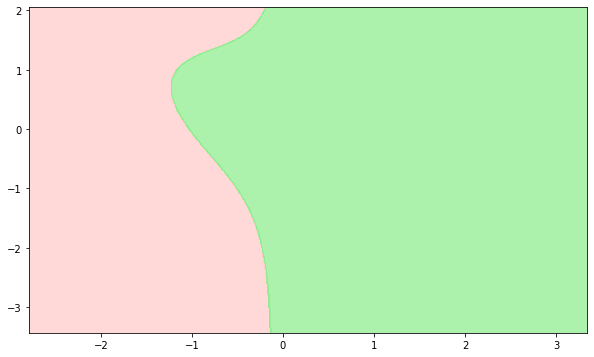

In [94]:
plot_decision_boundary(X, y, classifier_3)

In [93]:
def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, 
                                 stop = X_set.iloc[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set.iloc[:, 1].min() - 1, 
                                 stop = X_set.iloc[:, 1].max() + 1, 
                                 step = 0.01))
  plt.figure(figsize=(10,6))
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap_boundary)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set.loc[(y_set == j, 0)], X_set.loc[(y_set == j, 1)],
                c = (zero_one_colourmap_pts)(i), label = j)
     
  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()
def generate_clf(input_gamma, input_C=5):
  classifier = SVC(kernel="poly", gamma=input_gamma, C=input_C)
  classifier.fit(X, y.ravel())
  y_pred = classifier.predict(X)
  print("Training Accuracy = {}".format(accuracy_score(y_pred, y)))
  return classifier

(1, 7)
(2, 7)
(8, 4)
(4, 6)
(0, 9)
(3, 9)
(6, 8)


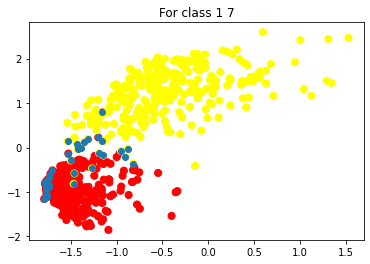

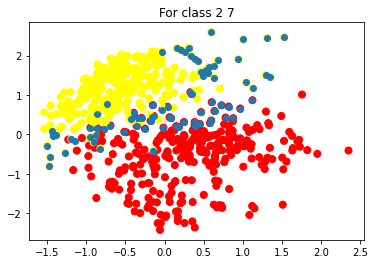

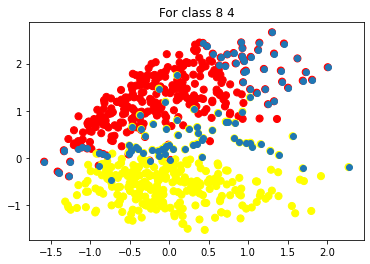

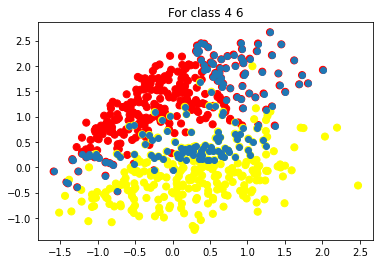

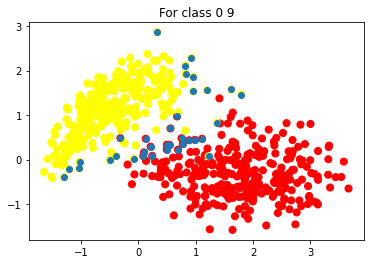

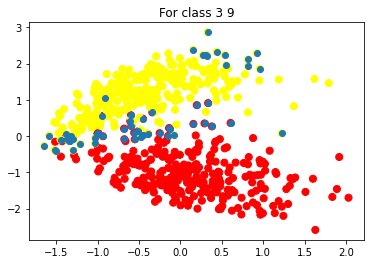

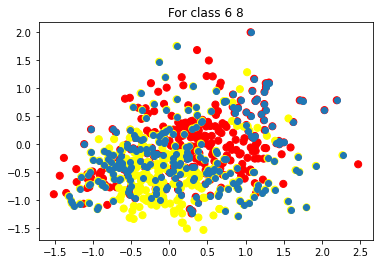

In [73]:
dict_check={'a':(1,7),'b':(2,7),'c':(8,4),'d':(4,6),'e':(0,9),'f':(3,9),'g':(6,8)}
for elem in dict_check:
    plt.figure()
    print(dict_check[elem])
    data_vis(dict_check[elem])

In [58]:
df,labels=data_prepare(1,2)

In [59]:
np.unique(labels)

array([1, 2], dtype=int64)

ValueError: cannot reshape array of size 9000 into shape (30,30)

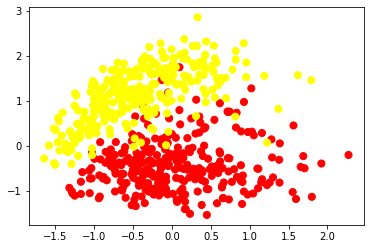

In [36]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [48]:
xlim

(-1.8401634995, 2.4673504255000003)

array([[ 0.08818431,  0.25494838,  0.42171244,  0.58847651,  0.75524058,
         0.92200464,  1.08876871,  1.25553278,  1.42229685,  1.58906091,
         1.75582498,  1.92258905,  2.08935311,  2.25611718,  2.42288125,
         2.58964532,  2.75640938,  2.92317345,  3.08993752,  3.25670158,
         3.42346565,  3.59022972,  3.75699379,  3.92375785,  4.09052192,
         4.25728599,  4.42405005,  4.59081412,  4.75757819,  4.92434226],
       [-0.06035065,  0.10641341,  0.27317748,  0.43994155,  0.60670561,
         0.77346968,  0.94023375,  1.10699782,  1.27376188,  1.44052595,
         1.60729002,  1.77405408,  1.94081815,  2.10758222,  2.27434629,
         2.44111035,  2.60787442,  2.77463849,  2.94140255,  3.10816662,
         3.27493069,  3.44169476,  3.60845882,  3.77522289,  3.94198696,
         4.10875102,  4.27551509,  4.44227916,  4.60904323,  4.77580729],
       [-0.20888562, -0.04212155,  0.12464252,  0.29140658,  0.45817065,
         0.62493472,  0.79169879,  0.95846285,  1

ValueError: cannot reshape array of size 9000 into shape (30,30)

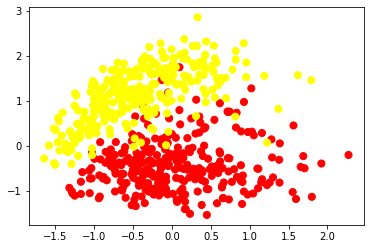

In [42]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [43]:
np.linspace(0,10,100)

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [5]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=10)
model.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
model.support_vectors_

array([[ 1.29615419, -0.72186459],
       [ 1.52591605, -0.60032653],
       [ 0.96906594, -0.33984862],
       ...,
       [-0.15733324,  1.15484398],
       [-0.5725729 ,  0.39488508],
       [ 0.68830187,  1.51916414]])

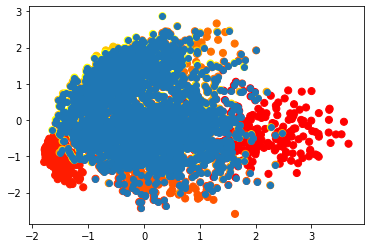

In [6]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

ValueError: cannot reshape array of size 9000 into shape (30,30)

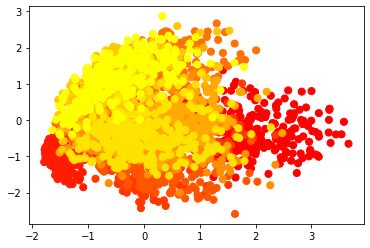

In [8]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 3000)
yy = np.linspace(ylim[0], ylim[1], 3000)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()